# IBM Professional Certificate in Data Science Final Project
My family is looking for a home to buy.  This project was created to fulfill the final project requirements for IBM's Data Science certificate program and to aid my family in that search.  First, I will need data on houses for sale.  I will scrape that data from Trulia.com, a realty aggregator.  Next, I want to score houses based on several factors to find which homes best fulfill criteria important to my family.  

Using the Trulia data, I will calculate square feet per dollar, since purchasing more home for the same price is desirable. We would also like to live close to my parents and siblings, so we will be limiting our search geographically, then calculating exact distances to each family member.  **Note: since this project is being shared with strangers, I am using arbitrary addresses rather than their actual addresses for privacy reasons.**  Next, I will calculate the distance to the nearest Costco, as this is our favorite store and represents a significant portion of our annual grocery and home-goods expenses.  This will be done using Foursquare's API to discover nearby Costco locations.  Additionally, I will use the Foursquare API to generate information on the variety of nearby venues, as we would like plenty of options for dining, entertainment, etc.

Finally, I will use these variables to calculate a desirability score for each home, printing a table in order of desirability and visualizing the homes on a map using folium.

# We begin by importing the necessary libraries.

In [1]:
#Install and import the required libraries.  If necessary, pip install statements can be used to install libraries first.
import sys
from bs4 import BeautifulSoup as BS #BeautifulSoup is a Python library
                                    #for pulling data out of HTML and XML files.
import urllib.request
from urllib.request import urlopen,Request
import urllib.parse
import urllib.error
import ssl
import re
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### Now we will scrape data on houses for sale from Trulia.com.  We will use some filters built in to Trulia's website to pre-filter our results.

In [17]:
def get_headers():
    #Headers
    headers={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-language':'en-US,en;q=0.9',
            'cache-control':'max-age=0',
            'upgrade-insecure-requests':'1',
            'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

    return headers


ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
count=1 # for pagination
#Create variables for editing URL filter criteria.
num_beds = '3p_beds' #minimum of 3 bedrooms in the home.
num_baths = '2p_baths' #minimum of 2 bathrooms in the home.
price_range = '100000-320000_price' #Set minimum and maximum price for the home.
min_size = '1750p_sqft' #set minimum size of home to 1750 sqft
house_type = 'SINGLE-FAMILY_HOME_type' #Only interested in single-family homes.
max_age = '1979p_built' #Built after asbestos outlawed.
sale_type = 'fsbo,resale_lt/' #This prevents new construction/buildable plans from appearing.

#Instatiate lists for holding scraped data.
price=[]
add1=[]
area=[]
bed=[]
bath=[]
floor=[]

#List of starting URLs for beautiful soup to pull data from.
urls = ["https://www.trulia.com/for_sale/Lafayette,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/West_Lafayette,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/Westfield,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/Zionsville,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/Frankfort,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/Lebanon,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/Crawfordsville,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type)]

#Print statements can be uncommented for diagnostic purposes.  This section scrapes data from "cards" on Trulia's website.
for x in urls:
    count=1
    y=x
    while(count < 5):  # will go till 4 pages
        print(x)
        req = Request(x, headers=get_headers())  #req all headers
        htmlfile = urlopen(req)
        htmltext = htmlfile.read()
        #print (htmltext)
        soup = BS(htmltext,'html.parser')
        #print (soup.prettify())
       
        for tag in soup.findAll('div',attrs={'data-testid':'property-price'}): #gets price
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                price.append(row)

        #for tag in soup.findAll('div',attrs={'class':'Text__TextBase-sc-1i9uasc-0-div Text__TextContainerBase-sc-1i9uasc-1 lcNNgu'}): #gets add
                #row = tag.get_text()
                #print(row)
                #address.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-region'}): #add1
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                add1.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-street'}): #area code
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                area.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-beds'}): #bed
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                bed.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-baths'}): #bath
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                bath.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-floorSpace'}):  #floorsize
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                floor.append(row)
            
            # add more code here
        count=count+1
        page=str(count)+"_p"  # changes page,will go till page 4,total 120 links per city
        x=y+page
        
#Print statements to verify that the data has been loaded successfully into the lists.
print(add1[0:10])
print(area[0:10])
print(price[0:10])
print(bed[0:10])
print(bath[0:10])
print(floor[0:10])
data_frame = pd.DataFrame(list(zip(add1,area,price,bed,bath,floor)),columns=["Address","Location","Price","Bed","Bath","Size"]) #Create the dataframe by zipping the lists
data_frame.tail() #Check tail to ensure data is correct, and show how many houses were scraped in total.

https://www.trulia.com/for_sale/Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/
https://www.trulia.com/for_sale/Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/2_p
https://www.trulia.com/for_sale/Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/3_p
https://www.trulia.com/for_sale/Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/4_p
https://www.trulia.com/for_sale/West_Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/
https://www.trulia.com/for_sale/West_Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/2_p
https://www.trulia.com/for_sale/West_Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAM

,Address,Location,Price,Bed,Bath,Size
203,"Crawfordsville, IN",307 Diamond Ln,"$225,000",3bd,2ba,"1,921 sqft"
204,"Ladoga, IN",5526 E 1200 S,"$120,000",4bd,2ba,"1,808 sqft"
205,"Crawfordsville, IN",258 N Center Ln,"$219,000",3bd,3ba,"2,247 sqft"
206,"Crawfordsville, IN",307 Diamond Ln,"$225,000",3bd,2ba,"1,921 sqft"
207,"Ladoga, IN",5526 E 1200 S,"$120,000",4bd,2ba,"1,808 sqft"


In [3]:
#Save the obtained dataframe to csv
data_frame.to_csv('new_Indiana_home.csv') #Export the data to a csv file

### We can load the data from a csv file for developing the code, although when we run the full program we will pull fresh data from Trulia.

In [4]:
#import csv
import pandas as pd
import re
df = pd.read_csv('new_Indiana_home.csv',index_col=[0]) #Create a dataframe using the Trulia data that we scraped
df.head(5) #Verify that the data has been loaded successfully and correctly

,Address,Location,Price,Bed,Bath,Size
0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,"$319,000",4bd,4ba,"3,437 sqft"
1,"Lafayette, IN",4118 Penny Packers Mill Rd,"$225,000",3bd,3ba,"2,014 sqft"
2,"Lafayette, IN",1423 Sourgum Ln,"$207,000",3bd,3ba,"1,996 sqft"
3,"Lafayette, IN",4305 Fletcher Dr,"$214,900",4bd,3ba,"3,592 sqft"
4,"West Lafayette, IN",124 S 875 W,"$285,000",3bd,3ba,"2,000 sqft"


In [5]:
#Pre-processing of data - Stage 1
#We need to convert strings into floats so that we can perform mathematical comparisons later.
df = df[df['Price'] != 'Contact For Price'].reset_index(drop=True)
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip('+')).str.replace(",","").astype(float)
df['Bed'] = df['Bed'].map(lambda x: x.lstrip('bd').rstrip('bds')).astype(float)
df['Bath'] = df['Bath'].map(lambda x: x.lstrip('ba').rstrip('AaBbCc')).astype(float)
df['Size'] = df['Size'].map(lambda x: x.lstrip('sf').rstrip('sqft')).str.replace(",","").astype(float)
df2 = df["Address"].apply(lambda x: x.split(","))
df['City'] = df2.apply(lambda x: " ".join(x[-2].split()[:])) #Create a new city column in case we want to group by city later.

In [6]:
#Verify that pre-processing went as expected and datatypes make sense.
print(df.head())
print(df.dtypes.value_counts())

                      Address                    Location     Price  Bed  \
0  Jesco Hills, Lafayette, IN             2519 Rainbow Dr  319000.0  4.0   
1               Lafayette, IN  4118 Penny Packers Mill Rd  225000.0  3.0   
2               Lafayette, IN             1423 Sourgum Ln  207000.0  3.0   
3               Lafayette, IN            4305 Fletcher Dr  214900.0  4.0   
4          West Lafayette, IN                 124 S 875 W  285000.0  3.0   

   Bath    Size            City  
0   4.0  3437.0       Lafayette  
1   3.0  2014.0       Lafayette  
2   3.0  1996.0       Lafayette  
3   3.0  3592.0       Lafayette  
4   3.0  2000.0  West Lafayette  
float64    4
object     3
dtype: int64


In [7]:
#Checking missing values 
df.isnull().sum()

Address     0
Location    0
Price       0
Bed         0
Bath        0
Size        0
City        0
dtype: int64

In [8]:
#Checkng duplicate rows
print("Starting shape is ",df.shape) #get the initial size of the dataframe
# df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True) #This column was introduced when loading in the csv file and should be removed.
# df['dupes'] = df.duplicated(subset=['Address','Price','Bed','Bath','Size'])
df['dupes'] = df.duplicated(subset=['Address','Location']) #Since each house should have a unique street address, we can use this value to remove duplicate listings.
df=df[df['dupes'] != True].reset_index(drop=True)
df.shape #The shape should change if duplicates have been removed.

Starting shape is  (220, 7)


(41, 8)

### The above code shows that a considerable portion of our data was duplicated.  We can make a separate csv file and verify unique entries if we would like.

# Now we need to associate latitude and longitude data with the addresses.

In [9]:
#Import libraries for obtaining GPS coordinates of house addresses and visualizing locations.
import pandas as pd
import numpy as np
# import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
!pip install folium
import folium
from folium.plugins import FastMarkerCluster

  Using cached folium-0.11.0-py2.py3-none-any.whl (93 kB)
  Using cached branca-0.4.1-py3-none-any.whl (24 kB)


In [10]:
{
    "tags": [
        "hide-input",
    ]
}
from geopy.geocoders import Bing
bing_key = 'AhZHj8FQAx0m0ZcVnkpgKxTRiUw--XNYwdNys48WdJWgjis8x8dJ62NSP1heq78N'

In [11]:
#test geocoding for a single address.  We will use bing, since Nominatum does not have robust residential data.

locator = Bing(api_key = bing_key, user_agent = 'housing_explorer')
address = df.iloc[3,1] + " " + df.iloc[3,0] + ", United States"
location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))


The geograpical coordinate of 4305 Fletcher Dr Lafayette, IN, United States are 40.355457, -86.847656.


In [12]:
#Create a new column with the full address, which we will feed into our geocoder.
df['full_address'] = df['Location'] + " " + df['Address'] + ", United States"
df.head()

,Address,Location,Price,Bed,Bath,Size,City,dupes,full_address
0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,False,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un..."
1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,False,"4118 Penny Packers Mill Rd Lafayette, IN, Unit..."
2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,False,"1423 Sourgum Ln Lafayette, IN, United States"
3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,False,"4305 Fletcher Dr Lafayette, IN, United States"
4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,False,"124 S 875 W West Lafayette, IN, United States"


In [13]:
#Use Bing geocoding to obtain lat and long of addresses in a subset of the dataframe
from geopy.extra.rate_limiter import RateLimiter #Rate limiting may not be necessary, but our data set is small so it isn't a great burden.
#If the data set were large, we would verify Bing's ToS to see if batch calls can be made without delay.
df_test=df.iloc[:5] #create a subset of the dataframe to test code with
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df_test['location'] = df_test['full_address'].apply(geocode)
df_test['point'] = df_test['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df_test[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_test['point'].tolist(), index=df_test.index)
df_test.head()

<ipython-input-13-e0607231505d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['location'] = df_test['full_address'].apply(geocode)
<ipython-input-13-e0607231505d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['point'] = df_test['location'].apply(lambda loc: tuple(loc.point) if loc else None)
C:\Users\nbcla\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Address,Location,Price,Bed,Bath,Size,City,dupes,full_address,location,point,latitude,longitude,altitude
0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,False,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...","(2519 Rainbow Dr, Lafayette, IN 47904, United ...","(40.428314, -86.865967, 0.0)",40.428314,-86.865967,0.0
1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,False,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...","(4118 Penny Packers Mill Rd, Lafayette, IN 479...","(40.356407, -86.881485, 0.0)",40.356407,-86.881485,0.0
2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,False,"1423 Sourgum Ln Lafayette, IN, United States","(1423 Sourgum Ln, Lafayette, IN 47905, United ...","(40.395855, -86.829083, 0.0)",40.395855,-86.829083,0.0
3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,False,"4305 Fletcher Dr Lafayette, IN, United States","(4305 Fletcher Dr, Lafayette, IN 47909, United...","(40.355457, -86.847656, 0.0)",40.355457,-86.847656,0.0
4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,False,"124 S 875 W West Lafayette, IN, United States","(124 S 875 W, West Lafayette, IN 47906, United...","(40.414595, -87.069837, 0.0)",40.414595,-87.069837,0.0


In [17]:
#Since test worked, run on the full dataframe.
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['full_address'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df.head(25)

,Address,Location,Price,Bed,Bath,Size,City,dupes,full_address,location,point,latitude,longitude,altitude
0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,False,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...","(2519 Rainbow Dr, Lafayette, IN 47904, United ...","(40.428314, -86.865967, 0.0)",40.428314,-86.865967,0.0
1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,False,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...","(4118 Penny Packers Mill Rd, Lafayette, IN 479...","(40.356407, -86.881485, 0.0)",40.356407,-86.881485,0.0
2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,False,"1423 Sourgum Ln Lafayette, IN, United States","(1423 Sourgum Ln, Lafayette, IN 47905, United ...","(40.395855, -86.829083, 0.0)",40.395855,-86.829083,0.0
3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,False,"4305 Fletcher Dr Lafayette, IN, United States","(4305 Fletcher Dr, Lafayette, IN 47909, United...","(40.355457, -86.847656, 0.0)",40.355457,-86.847656,0.0
4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,False,"124 S 875 W West Lafayette, IN, United States","(124 S 875 W, West Lafayette, IN 47906, United...","(40.414595, -87.069837, 0.0)",40.414595,-87.069837,0.0
5,"West Lafayette, IN",2135 Ringneck Rd,319000.0,4.0,4.0,2432.0,West Lafayette,False,"2135 Ringneck Rd West Lafayette, IN, United St...","(2135 Ringneck Rd, West Lafayette, IN 47906, U...","(40.44897, -86.959076, 0.0)",40.448970,-86.959076,0.0
6,"Lafayette, IN",2101 Fieldstone Dr,314900.0,4.0,3.0,2276.0,Lafayette,False,"2101 Fieldstone Dr Lafayette, IN, United States","(2101 Fieldstone Dr, Lafayette, IN 47909, Unit...","(40.351856, -86.86454, 0.0)",40.351856,-86.864540,0.0
7,"Lafayette, IN",4030 Fletcher Dr,210000.0,3.0,3.0,3036.0,Lafayette,False,"4030 Fletcher Dr Lafayette, IN, United States","(4030 Fletcher Dr, Lafayette, IN 47909, United...","(40.359222, -86.848447, 0.0)",40.359222,-86.848447,0.0
8,"Lafayette, IN",2604 Margesson Xing,177000.0,3.0,3.0,2400.0,Lafayette,False,"2604 Margesson Xing Lafayette, IN, United States","(2604 Margesson Crossing, Lafayette, IN 47909,...","(40.356659, -86.855088, 0.0)",40.356659,-86.855088,0.0
9,"Prophet's Ridge, West Lafayette, IN",4523 Joshua Ct,215000.0,3.0,3.0,1920.0,West Lafayette,False,"4523 Joshua Ct Prophet's Ridge, West Lafayette...","(4523 Joshua Ct, West Lafayette, IN 47906, Uni...","(40.4823459, -86.8962337, 0.0)",40.482346,-86.896234,0.0


In [18]:
#Clean up the dataframe a bit by removing unnecessary columns.
df_homes = df.drop(['location','point','altitude','dupes'],axis=1)
df_homes.reset_index(inplace=True)
df_homes.head()

,index,Address,Location,Price,Bed,Bath,Size,City,full_address,latitude,longitude
0,0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967
1,1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485
2,2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083
3,3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656
4,4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,"124 S 875 W West Lafayette, IN, United States",40.414595,-87.069837


In [19]:
#Create a map to visualize house locations
map_indiana = folium.Map(location=[40.166,-86.557], zoom_start=10)

# add markers to map for each house in dataset.
for lat, lng, add, price in zip(df['latitude'], df['longitude'], df['Location'], df['Price']):
    label = '{}, {}'.format(price, add)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indiana)  

map_indiana

# Visualization shows that most of our addresses are correct, but some may appear in obviously incorrect locations.  We should probably make some code to eliminate homes with these incorrect coordinates.

In [20]:
#I know approximately the region that I am interested in.  Therefore, I can set maximum and minimum latitude and longitude values, and check that the points fall within these ranges.
#Any coordinates outside this zone will be eliminated.
#Create acceptable latitude and longitude threshholds
lat_max = 40.73
lat_min = 39.88
lng_max = -85.87
lng_min = -87.17

#Convert latitude and longitude values to float type in dataframe
df_homes['latitude'] = df_homes['latitude'].astype(float)
df_homes['longitude'] = df_homes['longitude'].astype(float)

print("Starting shape is ", df_homes.shape)
df_homes['lat_check'] = df_homes['latitude'].apply(lambda x: x < lat_min or x > lat_max)
df_homes = df_homes[df_homes['lat_check'] == False].reset_index(drop=True)
print("Shape after dropping latitude outliers is ", df_homes.shape)
df_homes['lng_check'] = df_homes['longitude'].apply(lambda x: x < lng_min or x > lng_max)
df_homes = df_homes[df_homes['lng_check'] == False].reset_index(drop=True)
print("Shape after dropping longitude outliers is ", df_homes.shape) #Shows how many data points have been dropped for being outside of desired geographical range.

Starting shape is  (41, 11)
Shape after dropping latitude outliers is  (32, 12)
Shape after dropping longitude outliers is  (32, 13)


In [55]:
#Looks like we have removed the incorrect coordinate addresses.  Let's visualize to be sure.
#Create a map to visualize house locations
map_indiana = folium.Map(location=[40.166,-86.557], zoom_start=10)

for lat, lng, add, price in zip(df_homes['latitude'], df_homes['longitude'], df_homes['Location'], df_homes['Price']):
    label = '{}, {}'.format(price, add)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indiana)  

map_indiana

NameError: name 'df_homes' is not defined

### Excellent.  There are no longer any markers outside of our designated area of acceptability.

Now it's time to gather some data from Foursquare.  Costco is our favorite store, so we need to know if there are any nearby.

In [4]:
{
    "tags": [
        "hide-input",
    ]
}
#Establish credentials
CLIENT_ID = 'QUFSJQ0MD1TTDMU2MBNKE43MVECHVG4LLCXDUT2KNBBJKEIE' # your Foursquare ID
CLIENT_SECRET = 'HKE3PZU5JXAXHVIOF01B3PF2NOIIJGSEH0N01AEYP1P5CNCT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [23]:
#Search for Costco locations.  I know that there are none in or near Lafayette, so we don't need to search there.
venue_name = 'Costco'
costco_url = 'https://api.foursquare.com/v2/venues/search?near=Zionsville,_IN&query={}&client_id={}&client_secret={}&v={}'.format(venue_name,CLIENT_ID,CLIENT_SECRET, VERSION)
costco_url

'https://api.foursquare.com/v2/venues/search?near=Zionsville,_IN&query=Costco&client_id=QUFSJQ0MD1TTDMU2MBNKE43MVECHVG4LLCXDUT2KNBBJKEIE&client_secret=HKE3PZU5JXAXHVIOF01B3PF2NOIIJGSEH0N01AEYP1P5CNCT&v=20180605'

In [24]:
#Find the locations of nearby Costco stores.
import requests # library to handle requests
results = requests.get(costco_url).json()
print(results)

venues = results['response']['venues']
costco_frame = pd.json_normalize(venues)
costco_locations = costco_frame[['id','name','location.address','location.lat','location.lng']]
# costco_locations[0:200]

{'meta': {'code': 200, 'requestId': '5feaaef1bec16445af65cdb3'}, 'response': {'venues': [{'id': '4ae33851f964a520dc9121e3', 'name': 'Costco', 'location': {'address': '9010 Michigan Rd', 'crossStreet': 'btwn Vincennes Rd & W 92nd St', 'lat': 39.917311923791274, 'lng': -86.22762019938833, 'labeledLatLngs': [{'label': 'display', 'lat': 39.917311923791274, 'lng': -86.22762019938833}], 'postalCode': '46268', 'cc': 'US', 'city': 'Indianapolis', 'state': 'IN', 'country': 'United States', 'formattedAddress': ['9010 Michigan Rd (btwn Vincennes Rd & W 92nd St)', 'Indianapolis, IN 46268', 'United States']}, 'categories': [{'id': '52e816a6bcbc57f1066b7a54', 'name': 'Warehouse Store', 'pluralName': 'Warehouse Stores', 'shortName': 'Warehouse Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1609215729', 'hasPerk': False}, {'id': '4db5e39c5da3a76f445b3620', 'name': 'Costco Gasoline', 'location': {'address': '901

In [25]:
#We are only interested in the store, and not auxiliary features such as pharmacy or gas station, so filter the dataframe accordingly.
costco_locations = costco_locations[costco_locations['name'] == 'Costco'].reset_index(drop=True).dropna()
costco_locations

,id,name,location.address,location.lat,location.lng
0,4ae33851f964a520dc9121e3,Costco,9010 Michigan Rd,39.917312,-86.227620
1,4b367462f964a520d23525e3,Costco,6110 E 86th St,39.914035,-86.062033
2,576c2c6b498e8fac2bf2bc8d,Costco,4628 E County Line Rd,39.638273,-86.089478


In [26]:
#Now we want to calculate the distance between the house and the nearest costco
from geopy import distance
house_loc = (df_homes.latitude[10],df_homes.longitude[10])
print(house_loc)
costco_loc = (costco_locations.loc[0,'location.lat'],costco_locations.loc[0,'location.lng'])
print(costco_loc)
print(distance.distance(house_loc,costco_loc).miles)

(40.355357, -86.833444)
(39.917311923791274, -86.22762019938833)
44.07555125086877


### Now that we know our distance calculation works, we create a function to perform the task on all addresses in the dataframe.

In [27]:
#Time to make a function to calculate the distance from the house to each costco, then store the shortest distance.
def get_costco_distance(h_lats,h_lngs,c_lats,c_lngs):
    distance_list =[] #create empty list to store distances
    
    for h_lat,h_lng in zip(h_lats,h_lngs): #loop through the latitude and longitude of the houses
        h_gps = (h_lat,h_lng) #create a variable to hold gps coordinates
#         print("GPS units of house are: ", h_gps)
        min_distance = 500 #set an arbitrarily high distance to costco
        
        for c_lat,c_lng in zip(c_lats,c_lngs):#loop through the latitude and longitude of costco locations
            c_gps = (c_lat,c_lng)
#             print("GPS units of costco are: ", c_gps)
            temp_distance = distance.distance(h_gps,c_gps).miles
#             print("Temp distance is: ", temp_distance)
            if temp_distance < min_distance:
                min_distance = temp_distance
#                 print('New minimum distance is: ',min_distance)
        distance_list.append(min_distance)
    print(distance_list)
    return distance_list

In [28]:
#Call the function
from geopy import distance
distances = get_costco_distance(df_homes['latitude'],df_homes['longitude'],costco_locations['location.lat'],costco_locations['location.lng'])

[48.83152408451641, 46.007856459359374, 45.8693452474836, 44.630985027925725, 56.254696103075744, 53.327860236117914, 45.12801152586064, 44.83738299820875, 44.97694599003802, 52.641368048664944, 44.07555125086877, 52.35018622331759, 53.331333632699575, 50.83158558211847, 72.86166776316016, 62.5375603693879, 62.42128779393411, 6.992622945323084, 9.71461024322826, 8.82415477984302, 9.229864375754904, 9.637193573929636, 9.454387328143639, 7.977414748083444, 36.63785729349094, 25.13560789451191, 38.71426426719332, 39.893576760945926, 36.99571291208435, 40.35405022663698, 39.89351682522584, 34.699131064177436]


### We will also calculate distance to family members.

In [29]:
#Create GPS locations for family.  For privacy reasons, these are arbitrary locations to show proof of concept.
# df_cleaned['GPS']=(df_cleaned['latitude'],df_cleaned['longitude'])
# df_cleaned.head()
family_dist_1 = (40.36,-86.86)
family_dist_2 = (40.07,-86.48)
family_dist_3 = (40.01,-86.13)

In [30]:
#Time to make a function to calculate the distance from the house to each costco, then store the shortest distance.
def get_family_distance(h_lats,h_lngs,f_gps):
    fam_distance_list =[] #create empty list to store distances
    
    for h_lat,h_lng in zip(h_lats,h_lngs): #loop through the latitude and longitude of the houses
        h_gps = (h_lat,h_lng) #create a variable to hold gps coordinates
#         print("GPS units of house are: ", h_gps)
        fam_dist = distance.distance(h_gps,f_gps).miles
#             print("Temp distance is: ", temp_distance)
#             print('New minimum distance is: ',min_distance)
        fam_distance_list.append(fam_dist)
    print(fam_distance_list)
    return fam_distance_list

In [31]:
#Calculate distances from family members for each house.
from geopy import distance
grandparent_distance = get_family_distance(df_homes['latitude'],df_homes['longitude'],family_dist_1)
older_distance = get_family_distance(df_homes['latitude'],df_homes['longitude'],family_dist_3)
younger_distance = get_family_distance(df_homes['latitude'],df_homes['longitude'],family_dist_2)

[4.724058728076005, 1.1608236340155365, 2.963419750257485, 0.7230375812370485, 11.694371682853772, 8.061973359617038, 0.6108864268800224, 0.6121473604602657, 0.34693117716553623, 8.655257747156046, 1.4378582256688888, 7.828002672217389, 8.969131362672018, 19.32151453257451, 28.38684500738414, 26.092290452264823, 25.952695603451676, 46.387797624018745, 41.81687888482946, 45.64929157882905, 46.47359320122408, 46.04485975467529, 49.820048986640586, 37.47777370721704, 37.607781221190116, 20.571534664074274, 35.98658100263386, 37.39518543810169, 37.46018506528261, 34.46174957802252, 37.276981421867845, 21.923830423144675]
[48.45868099149342, 46.397309263586834, 45.569351451959754, 44.83774800536446, 57.01509736683968, 53.287868364436655, 45.468501018914274, 45.01084020668347, 45.21488109213016, 51.99255625097596, 44.198841094315384, 51.9009565405517, 52.77674058612088, 47.82292965401475, 71.8255270247393, 59.55487733812405, 59.44935360650023, 0.8823908707438025, 3.923047496179996, 2.2431015

In [32]:
#Now we add the data to the dataframe.
df_homes['dist_to_costco'] = distances
df_homes['grand_dist'] = grandparent_distance
df_homes['older_dist'] = older_distance
df_homes['younger_dist'] = younger_distance
df_homes.head()

,index,Address,Location,Price,Bed,Bath,Size,City,full_address,latitude,longitude,lat_check,lng_check,dist_to_costco,grand_dist,older_dist,younger_dist
0,0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,False,False,48.831524,4.724059,48.458681,32.055756
1,1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485,False,False,46.007856,1.160824,46.397309,29.008622
2,2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083,False,False,45.869345,2.963420,45.569351,29.090137
3,3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656,False,False,44.630985,0.723038,44.837748,27.678847
4,4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,"124 S 875 W West Lafayette, IN, United States",40.414595,-87.069837,False,False,56.254696,11.694372,57.015097,39.215871


In [34]:
#Remove unnecessary columns and save to a new csv file.
df_homes = df_homes.drop(['lat_check','lng_check'],axis=1)
df_homes.to_csv('cleaned_homes.csv')

KeyError: "['lat_check' 'lng_check'] not found in axis"

In [2]:
#import csv
import pandas as pd
import re
df_cleaned = pd.read_csv('cleaned_homes.csv',index_col = [0]) #Create a dataframe using the Trulia data that we scraped
df_cleaned.head(5) #Verify that the data has been loaded successfully and correctly

,index,Address,Location,Price,Bed,Bath,Size,City,full_address,latitude,longitude,dist_to_costco,grand_dist,older_dist,younger_dist
0,0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,48.831524,4.724059,48.458681,32.055756
1,1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485,46.007856,1.160824,46.397309,29.008622
2,2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083,45.869345,2.963420,45.569351,29.090137
3,3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656,44.630985,0.723038,44.837748,27.678847
4,4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,"124 S 875 W West Lafayette, IN, United States",40.414595,-87.069837,56.254696,11.694372,57.015097,39.215871


In [3]:
#Test to verify that we can discover nearby venues using Foursquare API
import requests
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
.format(CLIENT_ID, CLIENT_SECRET, df_cleaned['latitude'][0], df_cleaned['longitude'][0], VERSION, radius, LIMIT)
url
results_test = requests.get(url).json()
results_test

NameError: name 'CLIENT_ID' is not defined

In [5]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [6]:
#Function for searching nearby venues of each home's address.
def getNearbyVenues(names, latitudes, longitudes):#, radius=8000): #Radius is equivalent to 5 miles.
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        #url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            #radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Home Address', 
                  'Home Latitude', 
                  'Home Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
#Retrieve nearby venues for each home's address.
home_venues = getNearbyVenues(names = df_cleaned['full_address'], latitudes = df_cleaned['latitude'],longitudes = df_cleaned['longitude'])

2519 Rainbow Dr Jesco Hills, Lafayette, IN, United States
4118 Penny Packers Mill Rd Lafayette, IN, United States
1423 Sourgum Ln Lafayette, IN, United States
4305 Fletcher Dr Lafayette, IN, United States
124 S 875 W West Lafayette, IN, United States
2135 Ringneck Rd West Lafayette, IN, United States
2101 Fieldstone Dr Lafayette, IN, United States
4030 Fletcher Dr Lafayette, IN, United States
2604 Margesson Xing Lafayette, IN, United States
4523 Joshua Ct Prophet's Ridge, West Lafayette, IN, United States
4277 Tripoli Dr Lafayette, IN, United States
3377 Morgan St University Farms, West Lafayette, IN, United States
4517 Hayloft Dr #192 West Lafayette, IN, United States
5990 W 252 N Delphi, IN, United States
7751 N 1000 E Remington, IN, United States
12082 Clearwater Dr W Monticello, IN, United States
11043 Sunset Ct Monticello, IN, United States
2914 Bridlewood Ln Carmel, IN, United States
18236 Nickel Plate Dr Westfield, IN, United States
3459 Heathcliff Ct Westfield, IN, United State

In [8]:
#Check that retrieval worked.
print(home_venues.shape)
home_venues.head()

(2290, 7)


,Home Address,Home Latitude,Home Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,Arni's,40.429828,-86.872692,Pizza Place
1,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,Downtowner,40.430940,-86.872272,Breakfast Spot
2,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,Family Video,40.424479,-86.859921,Video Store
3,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,Columbian Park,40.414534,-86.868926,Park
4,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,East End Grill,40.419246,-86.885366,American Restaurant


In [9]:
print('There are {} uniques categories.'.format(len(home_venues['Venue Category'].unique())))

There are 169 uniques categories.


In [10]:
#Count unique venues for each unique home address
unique_count=pd.DataFrame(home_venues.groupby(home_venues['Home Address']).nunique())
# unique_count['Venue Category']
df_cleaned.set_index(df_cleaned['full_address'], inplace=True) #set index to match unique_count's index
df_cleaned['unique_count']=unique_count['Venue Category'] #Add count of unique venues to df_cleaned dataframe
df_cleaned.head() #Check that it worked.

,index,Address,Location,Price,Bed,Bath,Size,City,full_address,latitude,longitude,dist_to_costco,grand_dist,older_dist,younger_dist,unique_count
full_address,,,,,,,,,,,,,,,,
"2519 Rainbow Dr Jesco Hills, Lafayette, IN, United States",0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,48.831524,4.724059,48.458681,32.055756,60
"4118 Penny Packers Mill Rd Lafayette, IN, United States",1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485,46.007856,1.160824,46.397309,29.008622,55
"1423 Sourgum Ln Lafayette, IN, United States",2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083,45.869345,2.963420,45.569351,29.090137,49
"4305 Fletcher Dr Lafayette, IN, United States",3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656,44.630985,0.723038,44.837748,27.678847,55
"124 S 875 W West Lafayette, IN, United States",4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,"124 S 875 W West Lafayette, IN, United States",40.414595,-87.069837,56.254696,11.694372,57.015097,39.215871,12


In [11]:
#Calculate square feet per dollar and add to dataframe
df_cleaned['sqft_per_dollar']=df_cleaned['Size']/df_cleaned['Price']
df_cleaned.head()

,index,Address,Location,Price,Bed,Bath,Size,City,full_address,latitude,longitude,dist_to_costco,grand_dist,older_dist,younger_dist,unique_count,sqft_per_dollar
full_address,,,,,,,,,,,,,,,,,
"2519 Rainbow Dr Jesco Hills, Lafayette, IN, United States",0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,48.831524,4.724059,48.458681,32.055756,60,0.010774
"4118 Penny Packers Mill Rd Lafayette, IN, United States",1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485,46.007856,1.160824,46.397309,29.008622,55,0.008951
"1423 Sourgum Ln Lafayette, IN, United States",2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083,45.869345,2.963420,45.569351,29.090137,49,0.009643
"4305 Fletcher Dr Lafayette, IN, United States",3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656,44.630985,0.723038,44.837748,27.678847,55,0.016715
"124 S 875 W West Lafayette, IN, United States",4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,"124 S 875 W West Lafayette, IN, United States",40.414595,-87.069837,56.254696,11.694372,57.015097,39.215871,12,0.007018


In [12]:
#Create a weighted distance score.  It is most important that our children live near their grandparents, so we will weight their distance more heavily.
g_weight = 0.5
y_weight = 0.25
o_weight=0.25
df_cleaned['weighted_dist_score']=df_cleaned['grand_dist']*g_weight+df_cleaned['younger_dist']*y_weight+df_cleaned['older_dist']*o_weight
df_cleaned.head()

,index,Address,Location,Price,Bed,Bath,Size,City,full_address,latitude,longitude,dist_to_costco,grand_dist,older_dist,younger_dist,unique_count,sqft_per_dollar,weighted_dist_score
full_address,,,,,,,,,,,,,,,,,,
"2519 Rainbow Dr Jesco Hills, Lafayette, IN, United States",0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,48.831524,4.724059,48.458681,32.055756,60,0.010774,22.490639
"4118 Penny Packers Mill Rd Lafayette, IN, United States",1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485,46.007856,1.160824,46.397309,29.008622,55,0.008951,19.431895
"1423 Sourgum Ln Lafayette, IN, United States",2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083,45.869345,2.963420,45.569351,29.090137,49,0.009643,20.146582
"4305 Fletcher Dr Lafayette, IN, United States",3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656,44.630985,0.723038,44.837748,27.678847,55,0.016715,18.490668
"124 S 875 W West Lafayette, IN, United States",4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,"124 S 875 W West Lafayette, IN, United States",40.414595,-87.069837,56.254696,11.694372,57.015097,39.215871,12,0.007018,29.904928


In [13]:
#Now we want to scale our variables so that they hold equal weight when modeling.  For example, all values for square feet per dollar are much smaller than distance to Costco.
import sklearn
from sklearn import preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
test_set = df_cleaned[['dist_to_costco','weighted_dist_score','unique_count','sqft_per_dollar']]
test_output = scaler.fit(test_set).transform(test_set)
test_output

array([[6.35183055e-01, 1.44602035e-01, 8.42105263e-01, 4.45650720e-01],
       [5.92315155e-01, 3.42956505e-02, 7.54385965e-01, 2.75515561e-01],
       [5.90212328e-01, 6.00691636e-02, 6.49122807e-01, 3.40035457e-01],
       [5.71411992e-01, 3.52518073e-04, 7.54385965e-01, 1.00000000e+00],
       [7.47878966e-01, 4.11980887e-01, 0.00000000e+00, 9.50796576e-02],
       [7.03444804e-01, 2.87497891e-01, 8.77192982e-01, 1.51656322e-01],
       [5.78957668e-01, 8.18898630e-03, 7.19298246e-01, 1.14690120e-01],
       [5.74545451e-01, 1.84551170e-03, 7.54385965e-01, 7.89325366e-01],
       [5.76664246e-01, 0.00000000e+00, 7.71929825e-01, 7.05542859e-01],
       [6.93022728e-01, 2.82566719e-01, 8.42105263e-01, 2.73567224e-01],
       [5.62979597e-01, 2.72195657e-03, 5.78947368e-01, 5.89333627e-02],
       [6.88602110e-01, 2.63362684e-01, 8.59649123e-01, 1.06773596e-01],
       [7.03497535e-01, 3.01043189e-01, 8.59649123e-01, 0.00000000e+00],
       [6.65547265e-01, 4.41200619e-01, 1.75438596e

In [14]:
#convert array to dataframe and name columns
df_test=pd.DataFrame(data=test_output)
df_test.rename(columns={0:'dist_to_costco',1:'weighted_dist_score',2:'unique_count',3:'sqft_per_dollar'},inplace=True)
df_test.head()

,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
0,0.635183,0.144602,0.842105,0.445651
1,0.592315,0.034296,0.754386,0.275516
2,0.590212,0.060069,0.649123,0.340035
3,0.571412,0.000353,0.754386,1.000000
4,0.747879,0.411981,0.000000,0.095080


In [15]:
#Now, we are going to use the values in our df_test dataframe to create an overall score for each house.
#We want the highest overall score to indicate the "best" house.  Therefore:
#A closer distance to Costco and family is desirable, so take 1-scaled distance for each variable
#More squarefeet per dollar is desirable, so leave value as is.
#More unique venues are desirable, so leave value as is.
#Finally, these variables are not equally important, so assign weights to each.
costco_wt = 1
family_wt = 1.5
unique_wt=0.5
purchase_wt = 1.2

df_test['overall_score']= \
(1-df_test['dist_to_costco'])*costco_wt \
+(1-df_test['weighted_dist_score'])*family_wt \
+df_test['unique_count']*unique_wt \
+(df_test['sqft_per_dollar'])*purchase_wt
df_test.head()

,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar,overall_score
0,0.635183,0.144602,0.842105,0.445651,2.734186
1,0.592315,0.034296,0.754386,0.275516,3.102816
2,0.590212,0.060069,0.649123,0.340035,2.936203
3,0.571412,0.000353,0.754386,1.000000,2.305252
4,0.747879,0.411981,0.000000,0.095080,2.220054


In [16]:
#Add the overall score to the df_cleaned dataframe.
df_cleaned.set_index(df_cleaned['index'],inplace=True)
# print(df_cleaned.head())
df_cleaned['overall_score']=scaler.fit(df_test[['overall_score']]).transform(df_test[['overall_score']])*100
df_cleaned.head()

,index,Address,Location,Price,Bed,Bath,Size,City,full_address,latitude,longitude,dist_to_costco,grand_dist,older_dist,younger_dist,unique_count,sqft_per_dollar,weighted_dist_score,overall_score
index,,,,,,,,,,,,,,,,,,,
0,0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,48.831524,4.724059,48.458681,32.055756,60,0.010774,22.490639,63.280559
1,1,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485,46.007856,1.160824,46.397309,29.008622,55,0.008951,19.431895,78.647934
2,2,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083,45.869345,2.963420,45.569351,29.090137,49,0.009643,20.146582,71.702208
3,3,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656,44.630985,0.723038,44.837748,27.678847,55,0.016715,18.490668,45.399266
4,4,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,"124 S 875 W West Lafayette, IN, United States",40.414595,-87.069837,56.254696,11.694372,57.015097,39.215871,12,0.007018,29.904928,41.847545


In [17]:
#Now we can map the houses!
#Create an empty map instance at appropriate location and zoom
import folium
map_indiana = folium.Map(location=[40.166,-86.557], zoom_start=10)

#Add marker to the map for each house.
for lat, lng, add, score in zip(df_cleaned['latitude'], df_cleaned['longitude'], df_cleaned['Location'], df_cleaned['overall_score']):
    label = 'Overall Score: {}, Address: {}'.format(score, add)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indiana)  

map_indiana

In [18]:
df_final=df_cleaned[['full_address','Price','Size','overall_score']]
df_final.sort_values('overall_score', ascending=False, inplace=True)
df_final.head(10)

<ipython-input-18-65c9d7f6f600>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.sort_values('overall_score', ascending=False, inplace=True)


,full_address,Price,Size,overall_score
index,,,,
25,"2914 Bridlewood Ln Carmel, IN, United States",298000.0,1848.0,100.000000
26,"18236 Nickel Plate Dr Westfield, IN, United St...",299900.0,2289.0,96.852326
27,"3459 Heathcliff Ct Westfield, IN, United States",279900.0,2326.0,90.150767
10,"4277 Tripoli Dr Lafayette, IN, United States",319900.0,2121.0,89.023004
6,"2101 Fieldstone Dr Lafayette, IN, United States",314900.0,2276.0,88.151258
29,"4814 Ashbrook Dr Noblesville, IN, United States",309999.0,2615.0,86.174728
31,"5773 Weeping Willow Pl Whitestown, IN, United ...",265000.0,2514.0,84.731763
28,"5202 Ashbrook Dr Noblesville, IN, United States",250000.0,2214.0,83.495584
1,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",225000.0,2014.0,78.647934


In [4]:
import sklearn
from sklearn import preprocessing
standardizer = sklearn.preprocessing.StandardScaler()
standard_set = df_cleaned[['dist_to_costco','weighted_dist_score','unique_count','sqft_per_dollar']]
standard_output = standardizer.fit(standard_set).transform(standard_set)
standard_output

NameError: name 'df_cleaned' is not defined

In [20]:
#convert array to dataframe and name columns
df_standard=pd.DataFrame(data=standard_output)
df_standard.rename(columns={0:'dist_to_costco',1:'weighted_dist_score',2:'unique_count',3:'sqft_per_dollar'},inplace=True)
df_standard.reset_index(inplace=True)
df_standard.head()

,index,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
0,0,0.567368,-0.773607,0.834169,0.752358
1,1,0.410850,-1.201686,0.540835,-0.014231
2,2,0.403172,-1.101664,0.188834,0.276480
3,3,0.334529,-1.333414,0.540835,3.250127
4,4,0.978840,0.264042,-1.981839,-0.827233


In [21]:
#We can also do some modeling on the data.  First, make a cleaner dataset with standard scaled ranking variables.
df_model = df_cleaned.drop(['index','Address','full_address','dist_to_costco','grand_dist','older_dist','younger_dist','unique_count','sqft_per_dollar','weighted_dist_score'],axis=1)
df_model.reset_index(inplace=True)
df_model['dist_to_costco'] = df_standard['dist_to_costco']
df_model['weighted_dist_score'] = df_standard['weighted_dist_score']
df_model['unique_count'] = df_standard['unique_count']
df_model['sqft_per_dollar'] = df_standard['sqft_per_dollar']
print(df_model.head())

   index                    Location     Price  Bed  Bath    Size  \
0      0             2519 Rainbow Dr  319000.0  4.0   4.0  3437.0   
1      1  4118 Penny Packers Mill Rd  225000.0  3.0   3.0  2014.0   
2      2             1423 Sourgum Ln  207000.0  3.0   3.0  1996.0   
3      3            4305 Fletcher Dr  214900.0  4.0   3.0  3592.0   
4      4                 124 S 875 W  285000.0  3.0   3.0  2000.0   

             City   latitude  longitude  overall_score  dist_to_costco  \
0       Lafayette  40.428314 -86.865967      63.280559        0.567368   
1       Lafayette  40.356407 -86.881485      78.647934        0.410850   
2       Lafayette  40.395855 -86.829083      71.702208        0.403172   
3       Lafayette  40.355457 -86.847656      45.399266        0.334529   
4  West Lafayette  40.414595 -87.069837      41.847545        0.978840   

   weighted_dist_score  unique_count  sqft_per_dollar  
0            -0.773607      0.834169         0.752358  
1            -1.201686      

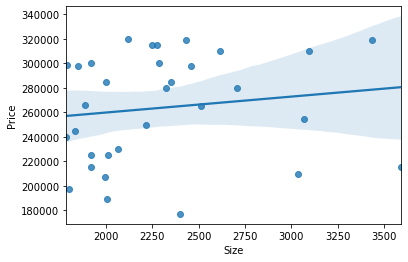

In [22]:
#Somewhat surprisingly, there is not a strong relationship between square footage and sale price.
ax=sns.regplot(x='Size',y='Price',data=df_model)

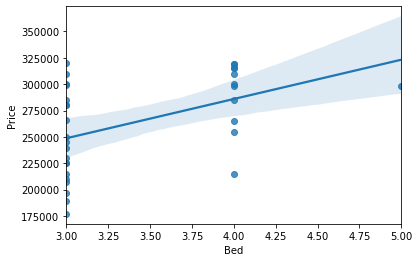

In [23]:
ax=sns.regplot(x='Bed',y='Price',data=df_model)

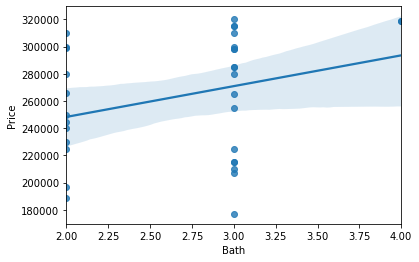

In [24]:
ax=sns.regplot(x='Bath',y='Price',data=df_model)

In [25]:
df_model.to_csv('modeling_data_set.csv')

In [2]:
df_model = pd.read_csv('modeling_data_set.csv',index_col=[0])

# Now we are going to cluster the homes so that if one desired home goes off the market or an offer is rejected we can easily find similar homes.

In [6]:
import sklearn
from sklearn import preprocessing
# set number of clusters
kclusters = 6

homes_clustering = df_model.drop(['Location','index','City'], 1)
standardizer = sklearn.preprocessing.StandardScaler()
standard_cluster_set = df_model[['Price','Bed','Bath','Size','latitude','longitude','overall_score']]
model_standard_output = standardizer.fit(standard_cluster_set).transform(standard_cluster_set)
print(model_standard_output)

#There is a faster, better way to do this, but I don't want to mess with it right now.
homes_clustering['Price']=standardizer.fit(homes_clustering[['Price']]).transform(homes_clustering[['Price']])
homes_clustering['Bed']=standardizer.fit(homes_clustering[['Bed']]).transform(homes_clustering[['Bed']])
homes_clustering['Bath']=standardizer.fit(homes_clustering[['Bath']]).transform(homes_clustering[['Bath']])
homes_clustering['Size']=standardizer.fit(homes_clustering[['Size']]).transform(homes_clustering[['Size']])
homes_clustering['latitude']=standardizer.fit(homes_clustering[['latitude']]).transform(homes_clustering[['latitude']])
homes_clustering['longitude']=standardizer.fit(homes_clustering[['longitude']]).transform(homes_clustering[['longitude']])
homes_clustering['overall_score']=standardizer.fit(homes_clustering[['overall_score']]).transform(homes_clustering[['overall_score']])

homes_clustering.head()

[[ 1.27231327e+00  1.07739116e+00  2.25143632e+00  2.35202760e+00
   3.51184313e-01 -8.10335477e-01  1.12287772e-01]
 [-8.95527058e-01 -7.37162370e-01  5.36056267e-01 -6.22612832e-01
   1.93552403e-02 -8.53328613e-01  7.21253103e-01]
 [-1.31064542e+00 -7.37162370e-01  5.36056267e-01 -6.60240048e-01
   2.01395838e-01 -7.08147126e-01  4.46013778e-01]
 [-1.12845458e+00  1.07739116e+00  5.36056267e-01  2.67603973e+00
   1.49712774e-02 -7.59604241e-01 -5.96296943e-01]
 [ 4.88200814e-01 -7.37162370e-01  5.36056267e-01 -6.51878444e-01
   2.87875274e-01 -1.37516411e+00 -7.37041556e-01]
 [ 1.27231327e+00  1.07739116e+00  2.25143632e+00  2.51174729e-01
   4.46505510e-01 -1.06829707e+00  2.57217657e-01]
 [ 1.17775854e+00  1.07739116e+00  5.36056267e-01 -7.49278059e-02
  -1.64624925e-03 -8.06381926e-01  1.09784280e+00]
 [-1.24145903e+00 -7.37162370e-01  5.36056267e-01  1.51377685e+00
   3.23456145e-02 -7.61795733e-01 -1.87539355e-01]
 [-2.00250936e+00 -7.37162370e-01  5.36056267e-01  1.84281901e-0

,Price,Bed,Bath,Size,latitude,longitude,overall_score,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
0,1.272313,1.077391,2.251436,2.352028,0.351184,-0.810335,0.112288,0.567368,-0.773607,0.834169,0.752358
1,-0.895527,-0.737162,0.536056,-0.622613,0.019355,-0.853329,0.721253,0.410850,-1.201686,0.540835,-0.014231
2,-1.310645,-0.737162,0.536056,-0.660240,0.201396,-0.708147,0.446014,0.403172,-1.101664,0.188834,0.276480
3,-1.128455,1.077391,0.536056,2.676040,0.014971,-0.759604,-0.596297,0.334529,-1.333414,0.540835,3.250127
4,0.488201,-0.737162,0.536056,-0.651878,0.287875,-1.375164,-0.737042,0.978840,0.264042,-1.981839,-0.827233


In [7]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(homes_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 2, 4, 0, 3, 3, 4, 4, 2])

In [8]:
# add clustering labels
df_model.insert(0, 'Cluster Labels', kmeans.labels_)
df_model.head()

,Cluster Labels,index,Location,Price,Bed,Bath,Size,City,latitude,longitude,overall_score,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
0,3,0,2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,40.428314,-86.865967,63.280559,0.567368,-0.773607,0.834169,0.752358
1,2,1,4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,40.356407,-86.881485,78.647934,0.410850,-1.201686,0.540835,-0.014231
2,2,2,1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,40.395855,-86.829083,71.702208,0.403172,-1.101664,0.188834,0.276480
3,4,3,4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,40.355457,-86.847656,45.399266,0.334529,-1.333414,0.540835,3.250127
4,0,4,124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,40.414595,-87.069837,41.847545,0.978840,0.264042,-1.981839,-0.827233


In [10]:
# Matplotlib and associated plotting modules
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[40.166,-86.557], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_model['latitude'], df_model['longitude'], df_model['Location'], df_model['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [25]:
# Matplotlib and associated plotting modules
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[40.166,-86.557], zoom_start=10)

# set color scheme for the clusters
x = np.arange(100)
print(x)
ys = [i + x + (i*x)**2 for i in range(100)]
# print("ys is: ", ys)
colors_array = cm.winter(np.linspace(0, 1, len(ys)))
# print("colors_array is: ", colors_array)
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, score in zip(df_model['latitude'], df_model['longitude'], df_model['Location'], df_model['Cluster Labels'], df_model['overall_score']):
    label = folium.Popup(str(poi) + ' Overall score: ' + str(score), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(score)-1],
        fill=True,
        fill_color=rainbow[int(score)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


# Let's look at the clusters in table format to see if any defining features pop out.

In [11]:
df_model.loc[df_model['Cluster Labels'] == 0, df_model.columns[[1] + list(range(3, df_model.shape[1]))]]

,index,Price,Bed,Bath,Size,City,latitude,longitude,overall_score,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
4,4,285000.0,3.0,3.0,2000.0,West Lafayette,40.414595,-87.069837,41.847545,0.978840,0.264042,-1.981839,-0.827233
13,13,279900.0,3.0,3.0,2706.0,Delphi,40.583297,-86.638740,31.446530,0.678233,0.377439,-1.923172,0.287087
14,16,299900.0,3.0,2.0,1920.0,Remington,40.716170,-87.129882,0.000000,1.899377,2.546039,-1.571171,-1.085993
16,20,309900.0,4.0,3.0,3094.0,Monticello,40.727333,-86.754021,7.770966,1.320659,1.640396,-1.043170,0.420008
28,36,254900.0,4.0,3.0,3068.0,Kokomo,40.450988,-86.159844,30.148855,-0.088700,0.859941,-0.515168,1.282903
29,37,284900.0,4.0,3.0,2351.0,Kokomo,40.502168,-86.233437,41.015345,0.097455,0.832230,-1.336504,-0.308177


In [12]:
df_model.loc[df_model['Cluster Labels'] == 1, df_model.columns[[1] + list(range(3, df_model.shape[1]))]]

,index,Price,Bed,Bath,Size,City,latitude,longitude,overall_score,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
17,25,298000.0,4.0,3.0,1848.0,Carmel,40.007244,-86.113759,100.000000,-1.751795,0.051919,1.186170,-1.170420
18,26,299900.0,4.0,3.0,2289.0,Westfield,40.052947,-86.178477,96.852326,-1.600913,-0.296987,1.127503,-0.568646
19,27,279900.0,3.0,2.0,2326.0,Westfield,40.037201,-86.106837,90.150767,-1.650271,0.048374,1.362170,-0.283751
20,28,250000.0,3.0,2.0,2214.0,Noblesville,40.046911,-86.082202,83.495584,-1.627783,0.196536,1.127503,-0.054222
21,29,309999.0,3.0,2.0,2615.0,Noblesville,40.052323,-86.087628,86.174728,-1.605204,0.158783,1.186170,-0.231024
22,30,297995.0,5.0,3.0,2460.0,Noblesville,40.045605,-86.012238,75.246332,-1.615337,0.669497,0.599502,-0.306851
23,31,265000.0,4.0,3.0,2514.0,Whitestown,39.980413,-86.353508,84.731763,-1.697207,-0.558419,-0.280501,0.211005


In [13]:
df_model.loc[df_model['Cluster Labels'] == 2, df_model.columns[[1] + list(range(3, df_model.shape[1]))]]

,index,Price,Bed,Bath,Size,City,latitude,longitude,overall_score,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
1,1,225000.0,3.0,3.0,2014.0,Lafayette,40.356407,-86.881485,78.647934,0.410850,-1.201686,0.540835,-0.014231
2,2,207000.0,3.0,3.0,1996.0,Lafayette,40.395855,-86.829083,71.702208,0.403172,-1.101664,0.188834,0.276480
9,9,215000.0,3.0,3.0,1920.0,West Lafayette,40.482346,-86.896234,60.850722,0.778551,-0.238191,0.834169,-0.023010
12,12,298900.0,3.0,2.0,1793.0,West Lafayette,40.483180,-86.914329,73.309667,0.816796,-0.166487,0.892836,-1.255640
25,33,197000.0,3.0,2.0,1800.0,Thorntown,40.130084,-86.612279,76.515323,-0.746115,-1.256566,-1.923172,0.063952
31,39,225000.0,3.0,2.0,1921.0,Crawfordsville,40.042246,-86.860882,66.560325,-0.216001,-0.318775,-0.573835,-0.188025


In [14]:
df_model.loc[df_model['Cluster Labels'] == 3, df_model.columns[[1] + list(range(3, df_model.shape[1]))]]

,index,Price,Bed,Bath,Size,City,latitude,longitude,overall_score,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
0,0,319000.0,4.0,4.0,3437.0,Lafayette,40.428314,-86.865967,63.280559,0.567368,-0.773607,0.834169,0.752358
5,5,319000.0,4.0,4.0,2432.0,West Lafayette,40.448970,-86.959076,66.937896,0.816603,-0.219054,0.951503,-0.572312
6,6,314900.0,4.0,3.0,2276.0,Lafayette,40.351856,-86.864540,88.151258,0.362079,-1.303002,0.423501,-0.738873
10,10,319900.0,3.0,3.0,2121.0,Lafayette,40.355357,-86.833444,89.023004,0.303741,-1.324218,-0.045833,-0.990100
11,11,315000.0,4.0,3.0,2250.0,West Lafayette,40.466883,-86.909771,70.945463,0.762410,-0.312718,0.892836,-0.774543


In [15]:
df_model.loc[df_model['Cluster Labels'] == 4, df_model.columns[[1] + list(range(3, df_model.shape[1]))]]

,index,Price,Bed,Bath,Size,City,latitude,longitude,overall_score,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
3,3,214900.0,4.0,3.0,3592.0,Lafayette,40.355457,-86.847656,45.399266,0.334529,-1.333414,0.540835,3.250127
7,7,210000.0,3.0,3.0,3036.0,Lafayette,40.359222,-86.848447,55.714355,0.345970,-1.327620,0.540835,2.300876
8,8,177000.0,3.0,3.0,2400.0,Lafayette,40.356659,-86.855088,60.298362,0.353706,-1.334782,0.599502,1.923371


In [16]:
df_model.loc[df_model['Cluster Labels'] == 5, df_model.columns[[1] + list(range(3, df_model.shape[1]))]]

,index,Price,Bed,Bath,Size,City,latitude,longitude,overall_score,dist_to_costco,weighted_dist_score,unique_count,sqft_per_dollar
15,18,239900.0,3.0,2.0,1788.0,Monticello,40.729347,-86.753679,19.223152,1.327104,1.658298,-1.043170,-0.644094
24,32,189000.0,3.0,2.0,2006.0,Kokomo,40.445466,-86.155850,37.183677,-0.108536,0.849482,-0.515168,0.684857
26,34,230000.0,3.0,2.0,2066.0,Kokomo,40.477871,-86.195257,44.216133,0.006560,0.849444,-0.397834,-0.000988
27,35,244900.0,3.0,2.0,1836.0,Kokomo,40.493983,-86.172819,47.746689,0.071931,1.037133,-0.339168,-0.625664
30,38,265900.0,3.0,2.0,1890.0,Kokomo,40.494111,-86.175175,49.715722,0.071927,1.027635,-0.339168,-0.789227


# Cluster analysis
Based on the above output, we can loosely categorize the clusters as follows:

**Cluster 0:** Characterized by low overall scores due to low venue diversity and either long average distances to Costco, family, or both.

**Cluster 1:** High scoring homes in the Westfield/Carmel area located close to Costco and generally with high venue diversity

**Cluster 2:** Middling to high scores with low average family distance scores (close to my parents) located to the North and West of Costco locations.

**Cluster 3:**  Similar to cluster 2, but cluster 2 and 3 are separated on price, with the more expensive homes falling into cluster 3.

**Cluster 4:** Homes in the Lafayette area with low overall scores.

